In [1]:
import scipy.io.wavfile as wf  # scipy의 io.wavfile 을 이용해 wav 파일 입출력
import numpy as np             # scipy는 출력값을 numpy array로 반환함
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path 
from math import cos,pi

In [2]:
# 16000hz, 16bit, stereo wav file
path = Path("music/Post Malone - Die For Me Ft. Halsey, Future.wav")

In [3]:
rate, data = wf.read(path)

In [4]:
rate

16000

In [5]:
data.shape # stereo : 2 ch

(4065024, 2)

In [6]:
left = data[:, 0]
right = data[:, 1]

# 원본 데이터 저장
left_orig = left.copy()
right_orig = right.copy()

right.setflags(write=1)
left.setflags(write=1)

In [7]:
left

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [8]:
right

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

## 데이터 확인

양쪽 체널 모두  -32767 ~ 32767 범위 (16bit)

In [9]:
pd.DataFrame(left).describe()

,0
count,4.065024e+06
mean,-4.879703e-01
std,1.084278e+04
min,-3.276800e+04
25%,-6.536000e+03
50%,0.000000e+00
75%,6.548000e+03
max,3.276700e+04


In [10]:
pd.DataFrame(right).describe()

,0
count,4.065024e+06
mean,-4.979742e-01
std,1.058492e+04
min,-3.276800e+04
25%,-6.359000e+03
50%,0.000000e+00
75%,6.379000e+03
max,3.276700e+04


# 4초 (1주기) 변환

- case 1

$$Left = \frac{\cos(x) +1}{2} $$

$$Right = \frac{\cos(x - \pi) +1}{2} $$

In [11]:
l = []
r = []
for i in range(16000 * 4):
    l.append((cos(float(i)/(16000 * 2) * pi)+1) / 2.0)
    r.append((cos(float(i)/(16000 * 2) * pi-pi)+1) / 2.0)

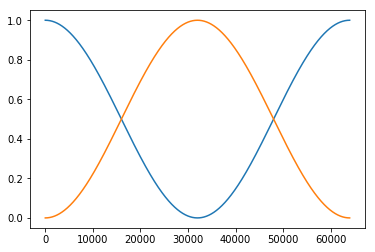

In [12]:
plt.plot(l) # blue
plt.plot(r) # orange

In [13]:
for i in range(16000 * 4):
    right[i] = right[i] * (cos(float(i)/(16000*2) * pi)+1) / 2.0
    left[i]  = left[i]  * (cos(float(i)/(16000*2) * pi - pi)+1) / 2.0 

### Left

0~4초

- orig = blue
- transform = orange

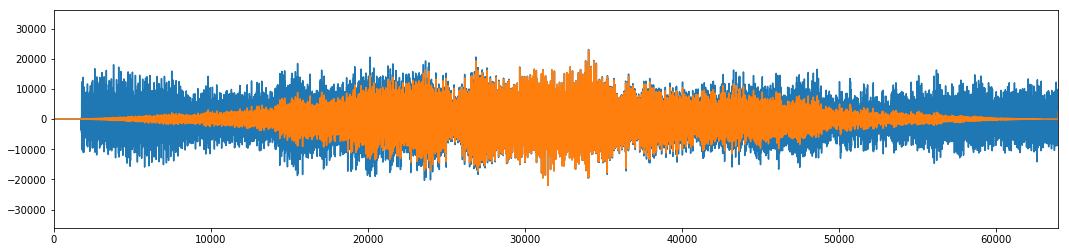

In [14]:
plt.figure(figsize=(18,4))
plt.xlim(0,16000 * 4)
plt.plot(left_orig)
plt.plot(left)

### Right

0~4초


- orig = blue
- transform = orange

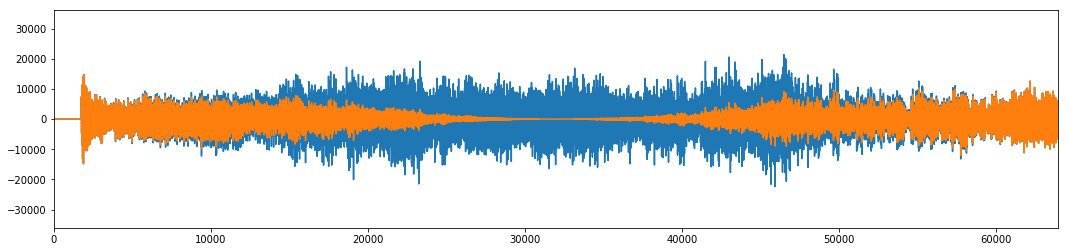

In [15]:
plt.figure(figsize=(18,4))
plt.xlim(0,16000 * 4)
plt.plot(right_orig)
plt.plot(right)

위 변환은 사용자를 중심으로 물체가 360도 회전할때 적합
(사용자의 오른쪽에서 시작하여 4초간 한바퀴 회전)

## 해결방안

사용자 앞의 점을 중심으로 한바퀴 회전할때, 어느 포인트(t)에서 가장 큰 소리를 내야하는지 고민할 필요가 있음